# Pymaceuticals Inc.
---

### Analysis

- Since the final graph of observed tumor volume for the entire Capomulin regimen has a high corelation meaning that the size of the tumor is related to the size of the mouse.

- From the box graph it looks like Capomulin and Ramicane is more effective at treating tumors than Infubinol and Ceftamin
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, left_on="Mouse ID",right_on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
print(len(merge_df["Mouse ID"].unique()))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_ids = duplicate_mice['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merge_df[merge_df['Mouse ID'] == duplicate_ids[0]]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by i]ts ID.
merge_df = merge_df[merge_df['Mouse ID'] != duplicate_ids[0]]
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(merge_df["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Calculating statistics for each group
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
}).reset_index()



summary_stats

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'
]).reset_index()

summary_stats

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

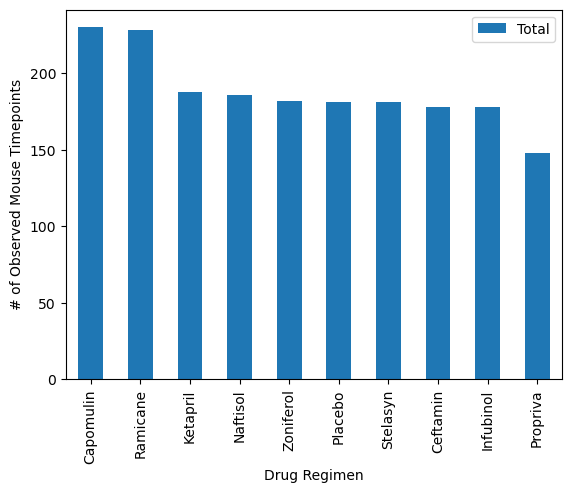

In [9]:
# Calculating statistics for each group
grouped = merge_df.groupby('Drug Regimen')
summary_stats = pd.DataFrame({
    'Total': grouped.size()
})
summary_stats = summary_stats.sort_values(by='Total', ascending=False).reset_index()
#print(summary_stats)
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_stats.plot(kind='bar', x='Drug Regimen', y='Total')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

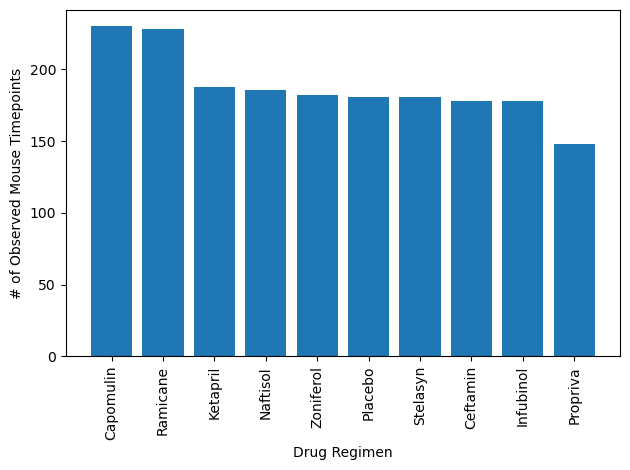

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(summary_stats['Drug Regimen'], summary_stats['Total'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

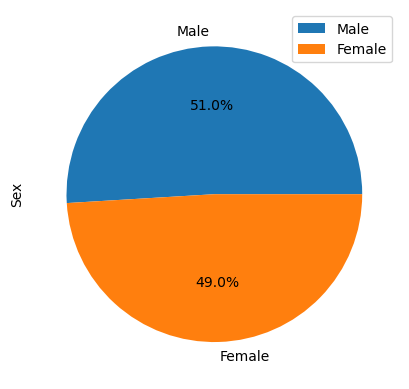

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped = merge_df.groupby('Sex')
summary_stats = pd.DataFrame({
    'Total': grouped.size()
})

summary_stats = summary_stats.sort_values(by='Total', ascending=False).reset_index()
indexed_stats = summary_stats.set_index('Sex')
#print(summary_stats)
indexed_stats.plot(kind='pie', y='Total',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

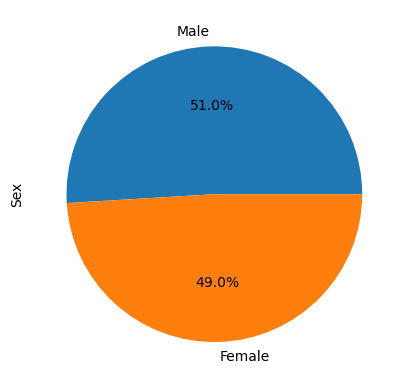

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = summary_stats['Sex'].value_counts()
#print(summary_stats)
labels = sex_distribution.index.tolist() 
plt.pie(summary_stats['Total'], labels=labels,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merge_df[merge_df['Drug Regimen'].isin(specified_regimens)]
#filtered_data

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
#max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged2_df = pd.merge(max_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
#merged2_df

#final_tumor_volumes
final_tumor_vol = merged2_df[['Mouse ID', 'Drug Regimen','Timepoint', 'Tumor Volume (mm3)']]
final_tumor_vol

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = specified_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    #regimen_data
    # add subset 
    tumor_data.append(regimen_data.tolist())
    
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers.append(regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)].tolist())
    
#print(tumor_data)
#print(outliers)

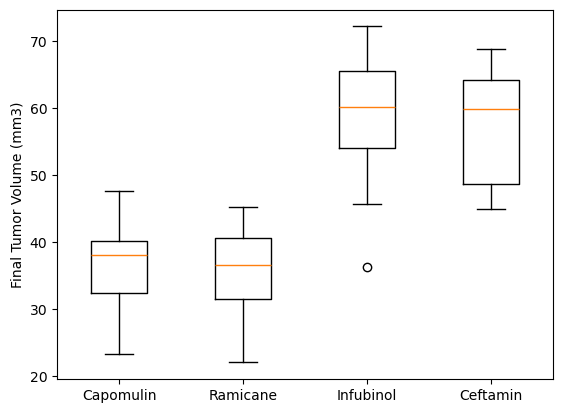

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels=specified_regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

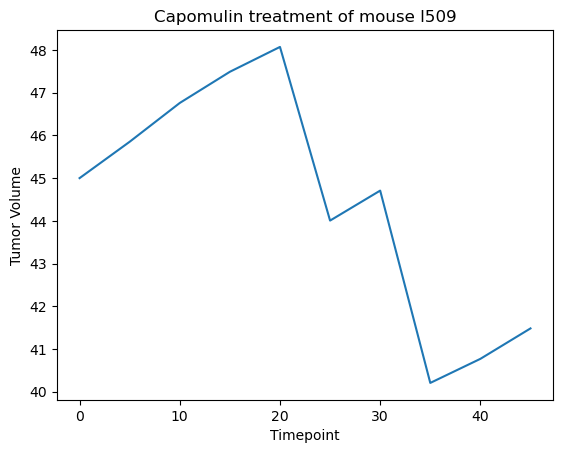

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_ID = merge_df[merge_df["Mouse ID"].isin(["l509"])]
Capomulin_ID = Capomulin_ID[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]].reset_index()
#Capomulin_ID

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.plot(Capomulin_ID['Timepoint'], Capomulin_ID['Tumor Volume (mm3)'])
plt.show()

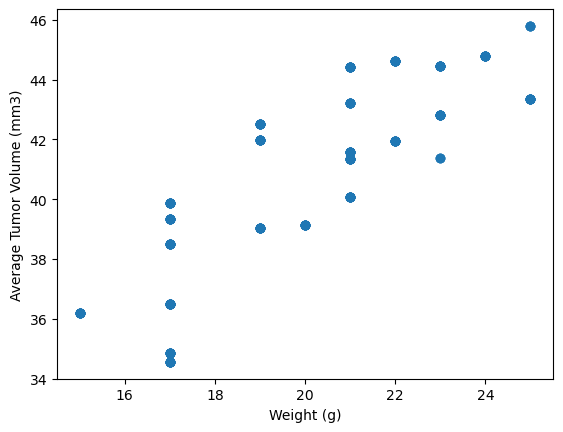

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = merge_df[merge_df["Drug Regimen"].isin(["Capomulin"])]
avg_capomulin = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_capomulin = avg_capomulin.reset_index()


final_capomulin = pd.merge(capomulin, avg_capomulin, on='Mouse ID')
#final_capomulin
final_capomulin = final_capomulin.rename(columns={'Tumor Volume (mm3)_y': 'Avg Tumor Volume'})
plt.scatter(final_capomulin['Weight (g)'], final_capomulin['Avg Tumor Volume'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

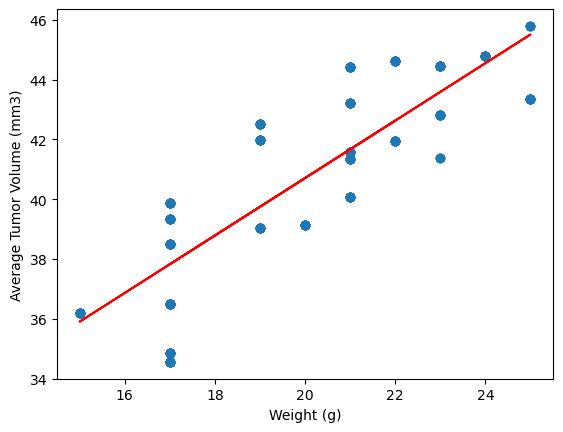

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(final_capomulin['Weight (g)'], final_capomulin['Avg Tumor Volume'])

pe_fit = pe_slope * final_capomulin['Weight (g)']  + pe_int

plt.plot(final_capomulin['Weight (g)'],pe_fit, color='red')

plt.scatter(final_capomulin['Weight (g)'], final_capomulin['Avg Tumor Volume'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()